Book's website: https://pragprog.com/book/pplearn/programming-machine-learning

Companion site: http://www.progml.com/

# Part I - From Zero to Learning Recognition
## Chapter 2: Your First Learning Program

In [1]:
import numpy as np

In [2]:
X,Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [6]:
X,Y

(array([13.,  2., 14., 23., 13.,  1., 18., 10., 26.,  3.,  3., 21.,  7.,
        22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10., 21.,
         5.,  6., 13., 13.]),
 array([33., 16., 32., 51., 27., 16., 34., 17., 29., 15., 15., 32., 22.,
        37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27., 37.,
        17., 18., 25., 23.]))

In [7]:
X[0:5]

array([13.,  2., 14., 23., 13.])

In [8]:
Y[0:5]

array([33., 16., 32., 51., 27.])

### Plot this

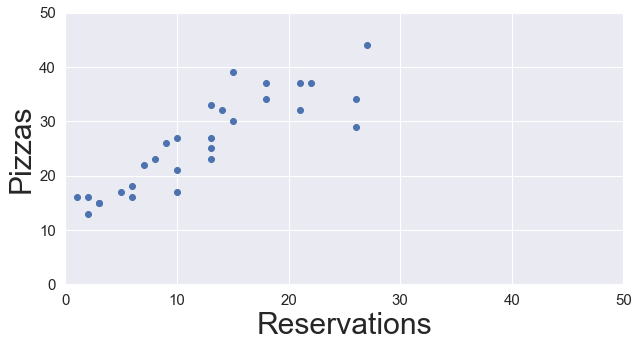

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # activate seaborn
plt.figure(figsize=(10,5)) # added by PTG: make it bigger
plt.axis([0, 50, 0, 50]) # scale axes (0 to 50)
plt.xticks(fontsize=15) # set x axis ticks
plt.yticks(fontsize=15) # set y axis ticks
plt.xlabel("Reservations", fontsize=30) # set x axis label
plt.ylabel("Pizzas", fontsize=30) # set y axis label
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True) # load data
plt.plot(X, Y, "bo") # plot data
plt.show() # display chart

Supervised learning with linear regression:

Training Phase: Trace a line that approximates the examples

Prediction phase: Use the line to predict the label from the input variable.

We're estimating that the function that approximates this data is a line.
Line: y = x * w

ŷ = x * w

ŷ is a forecast. y is the actual observation (the "ground truth")
w is constant that identifies the line (w is all we need to represent the line in code)
Watch Khan Academy screencasts on linear equations:  http://www.khanacademy.org/math/algebra/two-var-linear-equations

### Implementing Prediction

In [10]:
def predict(X, w):
    return X * w

That takes the input variable X and the weight w, and calculates ŷ.
Let's say that our line w is 2.1, and we have 20 reservations. How many pizzas can we expect to sell?

In [11]:
predict(20, 2.1)

42.0

### Implementing Training
Let's write code that implements the first part of linear regression: given a bunch of examples (X and Y), find a line w that approximates them. 

Programmer's approach:

Function that takes the examples (X and Y), and the line (w), and measures the line's error. The better the line approximates the examples, the lower the error. If we had such a function, we could use it to evaluate multiple lines until we find a line with a low enough error.

Calculate error:

error = predict(X, w) - Y

Error should be positive, so square it:

squared_error = error ** 2

Then, average the squared errors of all the examples, and we have our loss:

In [15]:
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

In [16]:
loss(X, Y, 1.5)

94.96666666666667

In [18]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))
        if loss(X, Y, w + lr) < current_loss:
            w += lr
        elif loss(X, Y, w - lr) < current_loss:
            w -= lr
        else:
            return w
    raise Exception("Couldn't converge within %d iterations" % iterations)

Arguments are X, Y, # of iterations to try, and lr (learning rate, or step size). This function starts with w = 0, and it measures the loss. Then it considers an alternative line, where you increase w by a small amount (step size). 

If the new line results in a lower loss than the current loss, then w + lr becomes the new line. Otherwise, try another line w - lr. If neither results in a lower loss, then return w (the current best line). 

Basically, this algorithm rotates the line at each iteration, making it steeper or less steep.

In [19]:
# Import the dataset
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

# Train the system
w = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f" % w)

# Predict the number of pizzas
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

The weight w = 1.84, which is the # of pizzas Roberto can be expected to sell for each reservation. If there are 20 reservations, he can expect to sell 36.8 pizzas. 

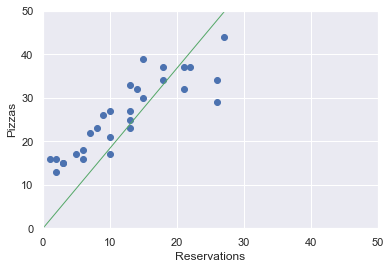

In [25]:
plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [0, predict(x_edge, w)], linewidth=1.0, color="g")
plt.ion()
plt.show()

Notice how the line doesn't exactly pass through the points. It shouldn't pass through the origin, and it should have less slope. 

So, we want to use the classic high school linear function: **y = mx + b**, or:

**ŷ = x * w + b**

In HS, m = "slope", and b = "y-intercept". In ML, w = "weight", and b = "bias".

The bias measures the shift of the line up & down the chart. The line crosses the y-axis at b. 

### New version of the above functions, incorporating bias:

In [26]:
def predict(X, w, b):
    return X * w + b


def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)


def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b

    raise Exception("Couldn't converge within %d iterations" % iterations)

Now, train the data again, incorporating b.

In [27]:
w, b = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f, b=%.3f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

Iteration 1067 => Loss: 29.045647
Iteration 1068 => Loss: 29.019947
Iteration 1069 => Loss: 28.994447
Iteration 1070 => Loss: 28.969147
Iteration 1071 => Loss: 28.944047
Iteration 1072 => Loss: 28.919147
Iteration 1073 => Loss: 28.894447
Iteration 1074 => Loss: 28.869947
Iteration 1075 => Loss: 28.845647
Iteration 1076 => Loss: 28.821547
Iteration 1077 => Loss: 28.797647
Iteration 1078 => Loss: 28.795500
Iteration 1079 => Loss: 28.769267
Iteration 1080 => Loss: 28.743233
Iteration 1081 => Loss: 28.717400
Iteration 1082 => Loss: 28.691767
Iteration 1083 => Loss: 28.666333
Iteration 1084 => Loss: 28.641100
Iteration 1085 => Loss: 28.616067
Iteration 1086 => Loss: 28.591233
Iteration 1087 => Loss: 28.566600
Iteration 1088 => Loss: 28.542167
Iteration 1089 => Loss: 28.517933
Iteration 1090 => Loss: 28.493900
Iteration 1091 => Loss: 28.470067
Iteration 1092 => Loss: 28.446433
Iteration 1093 => Loss: 28.423000
Iteration 1094 => Loss: 28.399767
Iteration 1095 => Loss: 28.376733
Iteration 1096

Now, let's plot the line:

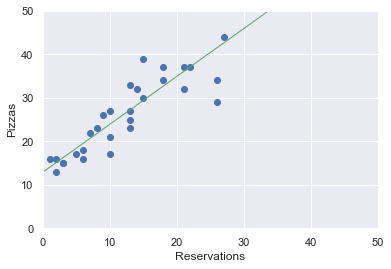

In [28]:
plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")
plt.ion()
plt.show()

### Hands-On: Tweaking the Learning Rate
Try changing lr (learning rate) to very small values, and to very large values

In [29]:
w, b = train(X, Y, iterations=10000, lr=0.005)
print("\nw=%.3f, b=%.3f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 808.838137
Iteration    2 => Loss: 804.820547
Iteration    3 => Loss: 800.813897
Iteration    4 => Loss: 796.818187
Iteration    5 => Loss: 792.833417
Iteration    6 => Loss: 788.859587
Iteration    7 => Loss: 784.896697
Iteration    8 => Loss: 780.944747
Iteration    9 => Loss: 777.003737
Iteration   10 => Loss: 773.073667
Iteration   11 => Loss: 769.154537
Iteration   12 => Loss: 765.246347
Iteration   13 => Loss: 761.349097
Iteration   14 => Loss: 757.462787
Iteration   15 => Loss: 753.587417
Iteration   16 => Loss: 749.722987
Iteration   17 => Loss: 745.869497
Iteration   18 => Loss: 742.026947
Iteration   19 => Loss: 738.195337
Iteration   20 => Loss: 734.374667
Iteration   21 => Loss: 730.564937
Iteration   22 => Loss: 726.766147
Iteration   23 => Loss: 722.978297
Iteration   24 => Loss: 719.201387
Iteration   25 => Loss: 715.435417
Iteration   26 => Loss: 711.680387
Iteration   27 => Loss: 707.936297
Iteration   28 => Lo

Iteration  891 => Loss: 53.421558
Iteration  892 => Loss: 53.392900
Iteration  893 => Loss: 53.364292
Iteration  894 => Loss: 53.335733
Iteration  895 => Loss: 53.307225
Iteration  896 => Loss: 53.278767
Iteration  897 => Loss: 53.250358
Iteration  898 => Loss: 53.222000
Iteration  899 => Loss: 53.193692
Iteration  900 => Loss: 53.165433
Iteration  901 => Loss: 53.137225
Iteration  902 => Loss: 53.109067
Iteration  903 => Loss: 53.080958
Iteration  904 => Loss: 53.052900
Iteration  905 => Loss: 53.052303
Iteration  906 => Loss: 53.023662
Iteration  907 => Loss: 52.995070
Iteration  908 => Loss: 52.966528
Iteration  909 => Loss: 52.938037
Iteration  910 => Loss: 52.909595
Iteration  911 => Loss: 52.881203
Iteration  912 => Loss: 52.852862
Iteration  913 => Loss: 52.824570
Iteration  914 => Loss: 52.796328
Iteration  915 => Loss: 52.768137
Iteration  916 => Loss: 52.739995
Iteration  917 => Loss: 52.711903
Iteration  918 => Loss: 52.683862
Iteration  919 => Loss: 52.655870
Iteration  920

Iteration 1512 => Loss: 38.955587
Iteration 1513 => Loss: 38.934745
Iteration 1514 => Loss: 38.913953
Iteration 1515 => Loss: 38.893212
Iteration 1516 => Loss: 38.872520
Iteration 1517 => Loss: 38.851878
Iteration 1518 => Loss: 38.831287
Iteration 1519 => Loss: 38.810745
Iteration 1520 => Loss: 38.790253
Iteration 1521 => Loss: 38.769812
Iteration 1522 => Loss: 38.749420
Iteration 1523 => Loss: 38.729078
Iteration 1524 => Loss: 38.708787
Iteration 1525 => Loss: 38.688545
Iteration 1526 => Loss: 38.688142
Iteration 1527 => Loss: 38.667317
Iteration 1528 => Loss: 38.646542
Iteration 1529 => Loss: 38.625817
Iteration 1530 => Loss: 38.605142
Iteration 1531 => Loss: 38.584517
Iteration 1532 => Loss: 38.563942
Iteration 1533 => Loss: 38.543417
Iteration 1534 => Loss: 38.522942
Iteration 1535 => Loss: 38.502517
Iteration 1536 => Loss: 38.482142
Iteration 1537 => Loss: 38.461817
Iteration 1538 => Loss: 38.441542
Iteration 1539 => Loss: 38.421317
Iteration 1540 => Loss: 38.401142
Iteration 1541

Iteration 2541 => Loss: 25.097558
Iteration 2542 => Loss: 25.089900
Iteration 2543 => Loss: 25.082292
Iteration 2544 => Loss: 25.074733
Iteration 2545 => Loss: 25.067225
Iteration 2546 => Loss: 25.059767
Iteration 2547 => Loss: 25.052358
Iteration 2548 => Loss: 25.045000
Iteration 2549 => Loss: 25.044803
Iteration 2550 => Loss: 25.036862
Iteration 2551 => Loss: 25.028970
Iteration 2552 => Loss: 25.021128
Iteration 2553 => Loss: 25.013337
Iteration 2554 => Loss: 25.005595
Iteration 2555 => Loss: 24.997903
Iteration 2556 => Loss: 24.990262
Iteration 2557 => Loss: 24.982670
Iteration 2558 => Loss: 24.975128
Iteration 2559 => Loss: 24.967637
Iteration 2560 => Loss: 24.960195
Iteration 2561 => Loss: 24.952803
Iteration 2562 => Loss: 24.945462
Iteration 2563 => Loss: 24.938170
Iteration 2564 => Loss: 24.930928
Iteration 2565 => Loss: 24.923737
Iteration 2566 => Loss: 24.916595
Iteration 2567 => Loss: 24.916572
Iteration 2568 => Loss: 24.908847
Iteration 2569 => Loss: 24.901172
Iteration 2570

So, changing the lr from .01 to .005 doubles the number of iterations needed. We get a w going from 1.1 to 1.09 (.01 difference), and b from 12.93 to 13.06

What if we make the lr large?

In [30]:
w, b = train(X, Y, iterations=10000, lr=0.1)
print("\nw=%.3f, b=%.3f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 734.374667
Iteration    2 => Loss: 660.258667
Iteration    3 => Loss: 590.518667
Iteration    4 => Loss: 525.154667
Iteration    5 => Loss: 464.166667
Iteration    6 => Loss: 407.554667
Iteration    7 => Loss: 355.318667
Iteration    8 => Loss: 307.458667
Iteration    9 => Loss: 263.974667
Iteration   10 => Loss: 224.866667
Iteration   11 => Loss: 190.134667
Iteration   12 => Loss: 159.778667
Iteration   13 => Loss: 133.798667
Iteration   14 => Loss: 112.194667
Iteration   15 => Loss: 94.966667
Iteration   16 => Loss: 82.114667
Iteration   17 => Loss: 73.638667
Iteration   18 => Loss: 69.538667
Iteration   19 => Loss: 68.735333
Iteration   20 => Loss: 67.952000
Iteration   21 => Loss: 67.188667
Iteration   22 => Loss: 66.445333
Iteration   23 => Loss: 65.722000
Iteration   24 => Loss: 65.018667
Iteration   25 => Loss: 64.335333
Iteration   26 => Loss: 63.672000
Iteration   27 => Loss: 63.028667
Iteration   28 => Loss: 62.405333